<a href="https://colab.research.google.com/github/bagcakaya/Hava_Kirlili-i_Proejsi/blob/main/Hava_Kirlilik_Proje_Kod_Dosyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # lineer cebir
import pandas as pd # veri işleme, CSV dosyası input/output (pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("/content/sample_data/data.csv",encoding="ISO-8859-1")
df.fillna(0, inplace=True)
data = df.loc[df['location'] == 'Chennai']
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
364025,768.0,14-12-15,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,18.0,69.0,0.0,"Vallalar Nagar, Chennai",0.0,2015-12-14
364026,768.0,16-12-15,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",13.0,20.0,77.0,0.0,"Vallalar Nagar, Chennai",0.0,2015-12-16
364027,768.0,18-12-15,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",11.0,18.0,58.0,0.0,"Vallalar Nagar, Chennai",0.0,2015-12-18
364028,768.0,22-12-15,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",13.0,16.0,50.0,0.0,"Vallalar Nagar, Chennai",0.0,2015-12-22
364029,768.0,28-12-15,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",16.0,20.0,137.0,0.0,"Vallalar Nagar, Chennai",0.0,2015-12-28


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#SO2 [Sülfür Dioksit (Kükürt Dioksit)]bireysel kirletici indeksini(si) hesaplama fonksiyonu
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]

In [ ]:
#NO2 (Azot dioksit) bireysel kirletici indeksini(ni) hesaplama fonksiyonu
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]

In [ ]:
#RSPM (PM2,5) indeksini(rpi) hesaplama fonksiyonu
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]


In [ ]:
#SPM (PM10) indeksini(spi) hesaplama fonksiyonu
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]

In [ ]:
#her veri değerinin hava kalitesi indeksini (AQI) hesaplama işlevi
#Hindistan hükümetinin standartlarına göre hesaplanır
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
345275,1/2/2004,Tamil Nadu,7.5000,15.9375,70.4125,100.886667,100.886667
345276,1/5/2004,Tamil Nadu,7.5000,8.7500,47.9125,111.333333,111.333333
345277,1/8/2004,Tamil Nadu,7.5000,6.7750,54.5875,118.220000,118.220000
345278,1/12/2004,Tamil Nadu,7.5000,21.0375,60.8375,112.666667,112.666667
345279,19-01-04,Tamil Nadu,7.7125,16.1500,52.0875,108.220000,108.220000


<Axes: xlabel='year', ylabel='AQI'>

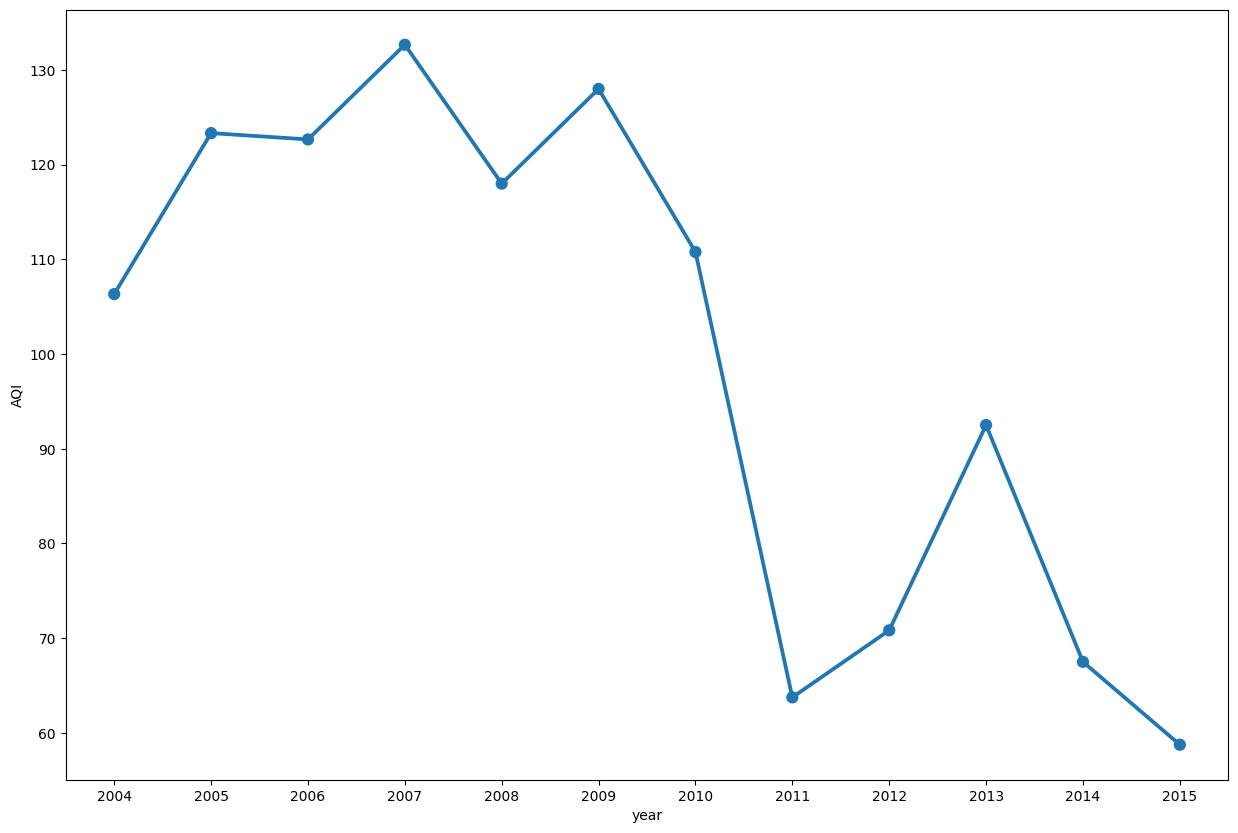

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [ ]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
364010,92.500000,2015-08-20
364011,109.333333,2015-08-25
364012,61.250000,2015-08-27
364013,66.250000,2015-10-01
364014,103.333333,2015-10-06
364015,72.500000,2015-10-08
364016,66.250000,2015-10-13
364017,103.333333,2015-10-15
364018,100.000000,2015-10-20
364019,100.666667,2015-10-27


In [ ]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
2004-01-31     93.039907
2004-02-29    113.320312
2004-03-31    100.685913
2004-04-30     95.847500
2004-05-31     95.117525
Freq: M, Name: AQI, dtype: float64

In [ ]:
#veri değerlerinin ön işlenmesi
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()


,date,AQI
0,2004-01-31,93.039907
1,2004-02-29,113.320312
2,2004-03-31,100.685913
3,2004-04-30,95.847500
4,2004-05-31,95.117525


In [ ]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)

,AQI
date,
2015-12-31,75.466102
2015-11-30,66.892655
2015-10-31,65.459877
2015-09-30,42.934783
2015-08-31,61.633895
...,...
2004-05-31,95.117525
2004-04-30,95.847500
2004-03-31,100.685913


In [ ]:
df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()

In [ ]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]


In [ ]:
data=data[data['month']==1]

In [ ]:
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,12.000000,12.000000
mean,2009.500000,98.934913
std,3.605551,26.311065
min,2004.000000,64.298487
25%,2006.750000,70.753977
50%,2009.500000,99.290329
75%,2012.250000,121.757534
max,2015.000000,136.259863


In [ ]:
import math

def filter_performance(pm25):
    # Parametreler ve ayarları tanımlayın.
    # Örneğin, bacanın maksimum iş yükü ve hassasiyet ayarları.

    if pm25 > 5:
        return "Sınır Aşımı"
    elif pm25 == 5:
        return "Sınırda"
    else:
        return "Normal Değer"

def evaluate_filter_performance(data):
    results = []

    for record in data:
        pm25 = record["pm25"]
        performance = filter_performance(pm25)
        results.append((pm25, performance))

    return results

# Örnek veri kümesi.
data = [
    {"pm25": 4.9},
    {"pm25": 5},
    {"pm25": 5.1},
    {"pm25": 0},
    {"pm25": -1},
]

# Filtre düzeninin performansını değerlendirin.
results = evaluate_filter_performance(data)

for result in results:
    print(f"PM2,5 Miktarı: {result[0]}, Performans: {result[1]}")

PM2,5 Miktarı: 4.9, Performans: Normal Değer
PM2,5 Miktarı: 5, Performans: Sınırda
PM2,5 Miktarı: 5.1, Performans: Sınır Aşımı
PM2,5 Miktarı: 0, Performans: Normal Değer
PM2,5 Miktarı: -1, Performans: Normal Değer


In [ ]:
#YEnerji Tüketimi sonucu oluşan partikülleri kontrol altına almak amacıyla Enerji Tüketiminde kullanılan cihazlar için geliştirilen uyarı sistemi.
def pm25_monitor(value):
    limit = 5
    if value > limit:
        return f"Uyarı: Hava kirliliği sınırını geçti. Şu anki PM2,5 değeri: {value} microgram/meter cube. Limit değeri: {limit} microgram/meter cube."
    else:
        return f"Gözlem sonucu: Hava kirliliği sınırına uygun. Şu anki PM2,5 değeri: {value} microgram/meter cube. Limit değeri: {limit} microgram/meter cube."

# Örnek kullanım
value = 10 # Burada değeri metreküp başına düşen ince partikül madde yoğunluğu olarak girebilirsin
result = pm25_monitor(value)
print(result)

Uyarı: Hava kirliliği sınırını geçti. Şu anki PM2,5 değeri: 10 microgram/meter cube. Limit değeri: 5 microgram/meter cube.


In [ ]:
# Benzinli Egzoz Emisyon Hesaplama
def calculate_gasoline_emission(vehicle_weight, engine_size, driving_distance):
    vehicle_mass = vehicle_weight / 9.81 # Newtons = kg * g (1000 N/kg)
    power_output = engine_size * 1.23     # watts (Based on empirical relationship)
    energy_consumption = (driving_distance * 277.78) / 100000 # GJoules (100 km/L, 100000 km/GJoules)
    co2_emission = (energy_consumption * 2.26) / (vehicle_mass * power_output) # kg CO2 (Based on emissions factor)
    return co2_emission

# LPG, CNG ve Dizel Araçlar için Egzoz Emisyon Hesaplama
def calculate_emission(vehicle_weight, engine_size, driving_distance, emissions_factor):
    vehicle_mass = vehicle_weight / 9.81 # Newtons = kg * g (1000 N/kg)
    power_output = engine_size * 1.23     # watts (Based on empirical relationship)
    energy_consumption = (driving_distance * 277.78) / 100000 # GJoules (100 km/L, 100000 km/GJoules)
    co2_emission = (energy_consumption * 2.26) / (vehicle_mass * power_output) # kg CO2 (Based on emissions factor)
    nox_emission = (energy_consumption * emissions_factor) / (vehicle_mass * power_output) # kg NOx (Based on emissions factor)
    return co2_emission, nox_emission

# Örnek kullanım
gasoline_emission = calculate_gasoline_emission(1300, 2.0, 5000)
print(f"Benzinli Araç Egzoz CO2 Emisyonu: {gasoline_emission} kg")

# Örnek veriler için LPG, CNG ve Dizel araçlar için emisyon hesaplama
lp_gas_emission = calculate_emission(1300, 2.0, 5000, 0.35)
print(f"LPG Araç Egzoz CO2 Emisyonu: {lp_gas_emission[0]} kg")
print(f"LPG Araç Egzoz NOx Emisyonu: {lp_gas_emission[1]} kg")

cng_emission = calculate_emission(1300, 2.0, 5000, 0.3)
print(f"CNG Araç Egzoz CO2 Emisyonu: {cng_emission[0]} kg")
print(f"CNG Araç Egzoz NOx Emisyonu: {cng_emission[1]} kg")

diesel_emission = calculate_emission(1300, 2.0, 5000, 0.3)
print(f"Dizel Araç Egzoz CO2 Emisyonu: {diesel_emission[0]} kg")
print(f"Dizel Araç Egzoz NOx Emisyonu: {diesel_emission[1]} kg")

Benzinli Araç Egzoz CO2 Emisyonu: 0.09628751200750467 kg
LPG Araç Egzoz CO2 Emisyonu: 0.09628751200750467 kg
LPG Araç Egzoz NOx Emisyonu: 0.014911782833020635 kg
CNG Araç Egzoz CO2 Emisyonu: 0.09628751200750467 kg
CNG Araç Egzoz NOx Emisyonu: 0.012781528142589114 kg
Dizel Araç Egzoz CO2 Emisyonu: 0.09628751200750467 kg
Dizel Araç Egzoz NOx Emisyonu: 0.012781528142589114 kg
